<a href="https://colab.research.google.com/github/Jerejuniorr/HelpHair_DesafioAlura/blob/main/Imers%C3%A3o_Alura_Desafio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

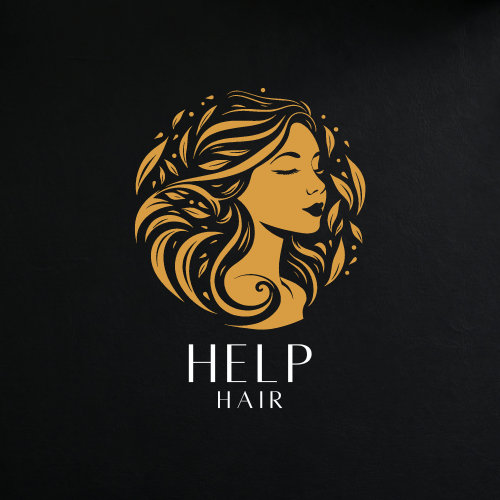

#**Cuidados Capilares**
Solucionamos a dificuldade na escolha de cosm√©ticos capilares adequados √†s necessidades individuais de cada cliente, oferecendo recomenda√ß√µes personalizadas a partir da an√°lise de seus dados.

O c√≥digo implementa um chatbot especializado em recomendar cosm√©ticos capilares. Ele usa a API do Google Gemini Pro, um modelo de linguagem avan√ßado, para entender a descri√ß√£o do cabelo do usu√°rio (curvatura, alergias, procedimentos realizados) e sua necessidade (ex: oleosidade, frizz). Com base nessas informa√ß√µes, o chatbot gera uma resposta personalizada com sugest√µes de produtos.

**Aplicabilidade no mercado:**

*   *E-commerce:* Integrar o chatbot em sites de venda de cosm√©ticos para oferecer um atendimento personalizado aos clientes, auxiliando na escolha do produto ideal.
*   *Marketing:* Criar campanhas interativas em redes sociais onde o chatbot analisa as necessidades dos usu√°rios e recomenda produtos espec√≠ficos, aumentando o engajamento e as vendas.
*   *Consultoria capilar:* Oferecer um servi√ßo de consultoria capilar online, automatizando a an√°lise do cabelo e a recomenda√ß√£o de produtos.
Em resumo, o c√≥digo oferece uma solu√ß√£o automatizada para personaliza√ß√£o de produtos, um diferencial competitivo relevante no mercado de cosm√©ticos.

Em resumo, o c√≥digo oferece uma solu√ß√£o automatizada para personaliza√ß√£o de produtos, um diferencial competitivo relevante no mercado de cosm√©ticos.



##**Iniciando**

In [2]:
#instalando genai
!pip install -q -U google-generativeai

#importando modelo e api key
import google.generativeai as genai
from google.colab import userdata

api_key = userdata.get('Api_Key')
genai.configure(api_key=api_key)

#configurando modelo
generation_config = {
  "temperature": 0.2,
  "top_p": 0.95,
  "top_k": 0,
}

#configurando seguran√ßa
safety_settings = [
  {
    "category": "HARM_CATEGORY_HARASSMENT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_HATE_SPEECH",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
]

##**Question√°rio**


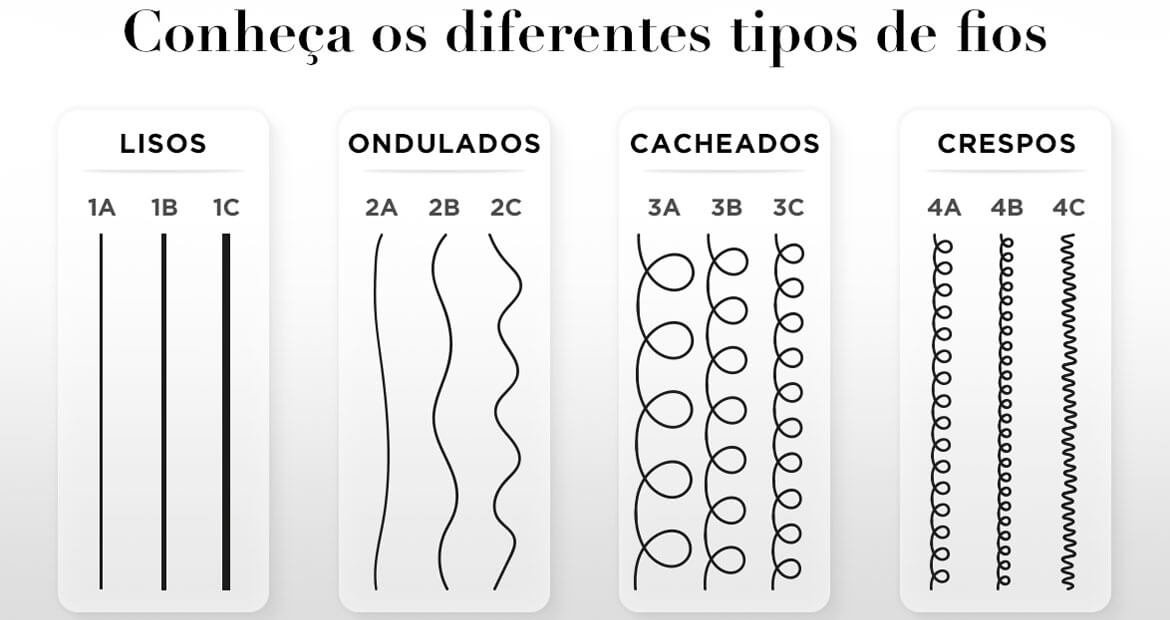

In [3]:
#Mostra imagem para as perguntas
!wget -q -O 'tipos_de_fios' 'https://www.loreal-paris.com.br/-/media/project/loreal/brand-sites/oap/americas/br/cabelos-2022/cabelo-ondulado/cabelo-ondulado-tipo-de-cabelo.jpg'

import cv2
from google.colab.patches import cv2_imshow

imagem = cv2.imread('tipos_de_fios')
cv2_imshow(imagem)

In [6]:
a# Cria o widget de texto para input (Tipo de fio?)
print('\n Escolha dentre as op√ß√µes acima qual melhor corresponde ao seu tipo de cabelo.\n Exemplo de resposta: 2c')
hairtype = input(' - ')

# Possui alergia?
print('\n Possui alergia √† algum produto quimico?')
alergia = input(' - ')


# Realizou algum procedimento recentemente?
print('\n Realizou algum procedimento capilar recentemente?\n Exemplo: Chapinha, progressiva, pintura, etc.')
procedimento = input(' - ')

# descri√ß√£o do cabelo
print('\n Descreva a condi√ß√£o atual do seu cabelo:\n Exemplo:Meu cabelo est√° seco, quebradi√ßo e com muito frizz.')
descricao = input(' - ')



 Escolha dentre as op√ß√µes acima qual melhor corresponde ao seu tipo de cabelo.
 Exemplo de resposta: 2c
 - 2c

 Possui alergia √† algum produto quimico?
 - n√£o

 Realizou algum procedimento capilar recentemente?
 Exemplo: Chapinha, progressiva, pintura, etc.
 - selagem org√¢nica

 Descreva a condi√ß√£o atual do seu cabelo:
 Exemplo:Meu cabelo est√° seco, quebradi√ßo e com muito frizz.
 - meu cabelo est√° fino, com pontas secas e apresentadno quedas

 Escolha dentre as op√ß√µes acima qual melhor corresponde ao seu tipo de cabelo.
 Exemplo de resposta: 2c
 - 2c

 Possui alergia √† algum produto quimico?
 - n√£o

 Realizou algum procedimento capilar recentemente?
 Exemplo: Chapinha, progressiva, pintura, etc.
 - selagem org√¢nica

 Descreva a condi√ß√£o atual do seu cabelo:
 Exemplo:Meu cabelo est√° seco, quebradi√ßo e com muito frizz.
 - meu cabelo est√° fino, com pontas secas e apresentadno quedas


##**Tratamento**

In [7]:
model = genai.GenerativeModel(model_name="gemini-1.5-pro-latest",
                              generation_config=generation_config,
                              safety_settings=safety_settings)

prompt_parts = [
  "aja como um vendedor de cosm√©ticos capilares. Analise a descri√ßao do cabelo e sua necessidade. Recomende porduto que solucione a demanda",
  "Curvatura: 1c",
  "alergia: n√£o",
  "Procedimento: N√£o",
  "Descricao: Meu cabelo est√° seco",
  "Produto: #**Seco**: √â necess√°rio repor a nutri√ß√£o. Utilize produtos √† base de √≥leo.\n**Sugest√µes**: \n-Copra √ìleo De C√¥co Extra Virgem;\n-Widi Care - √ìleo de argan\n-Salon Line - √ìleo de oliva: M√°scara Capilar",
  "Curvatura: 4b",
  "alergia: alergia √† coco",
  "Procedimento: fiz chapinha",
  "Descricao: meu cabelo t√° oleoso e com friz",
  "Produto: #**Oleosidade**: A oleosidade do couro cabeludo √© comum, mas o excesso deve ser tratado, utilize shampoos espec√≠ficos.\n**Sugest√µes**: \n- Elseve-Pure Hialur√¥nico Shampoo\n-Truss Professional Shampoo Equilibrium, Controle da oleosidade\n\n#**Frizz**: Procedimentos qu√≠micos e/ou t√©rmicos, como a sua chapinha, podem causar as quebras dos fio e gerar o frizz.\n**Sugest√µes**: \n-Pantene Pro-V Miracles Equil√≠brio Raiz e Pontas S√©rum Revitalizador\n-Itallian Hairtech Reparador De Pontas",
  "Curvatura: 3b",
  "alergia: argan",
  "Procedimento: recentemente fiz progressiva",
  "Descricao: meu cabelo ta com ponta dupla, seco e caindo",
  "Produto: #**Ponta dupla**: Quando h√° um dano, mec√¢nico, t√©rmico ou qu√≠mico, a cut√≠cula da ponta se desgasta e separa. Ap√≥s uma progressiva pontas duplas podem ser normais, voc√™ pode realizar uma \"emenda\"\n**Sugest√µes**: \n-Novex Creme De Tratamento, Recomposi√ß√£o Capilar -Niacinamida\n-Dove M√°scara Capilar De Tratamento Ritual De Repara√ß√£o\n\n#**Seco**: √â poss√≠vel que o cabelo ficar seco ap√≥s a progressiva\n**Sugest√µes**: \n- Felps Xbtx Quiabo Okra Alinhamento Capilar\n-Amend Condicionador Intensificador p√≥s progressiva\n\n#**Caindo**: Procedimentos qu√≠micos e t√©rmicos podem estressar o cabelo e resultar em queda.\nOBS: Quedas de cabelo podem ser resultados de outros fatores como como anemia, d√©ficit de nutrientes e disfun√ß√µes na tireoide. \nCuide da alimenta√ß√£o, hidrate-se, reduza o estresse, evite fumar, suspenda as qu√≠micas, Se persistir procure um m√©dico.\n**Sugest√µes**: \n-Inoar \nShampoo Crescimento Capilar \n- Lumina \nShampoo Estimulante para Antiqueda e Crescimento\n-Salon Line \nShampoo Sos Bomba Vitaminas Unit",
  "Curvatura: 1b",
  "alergia: n√£o",
  "Procedimento: pintura",
  "Descricao: quero hidratar meu cabelo",
  "Produto: #**Hidrata√ß√£o**: para manter uma boa hidrata√ß√£o ap√≥s o procedimento lave o cabelo apenas 2 - 3 vezes por semana para preservar a oleosidade natural, voce precisa repor a umidade perdida e garantir uma prote√ß√£o t√©rmica\n**Sugest√µes**:\n- Boni Natural\nShampoo Vegano e Natural de Argan e Linha√ßa\n-Elseve Haircare Creme De Tratamento L'Or√©al Elseve Pure Hialur√¥nico\n-Phytoervas Protetor Capilar Sol, Macela e Aquil√©ia",
  "Curvatura: 2c",
  "alergia: Phenoxyethanol",
  "Procedimento: nenhum",
  "Descricao: sem brilho",
  "Produto: #**Brilho**: Uso frequente de cremes podem gerar acumulo de res√≠duos e diminuir o brilho,  o cableo pode precisar de uma hidrata√ß√£o extra para recuperar o brilho.\n**Sugest√£o**:\n- Salon Line Shampoo Detox\n- M√°scara Novex Doctor R√≠cino",
  "Curvatura: " + hairtype,
  "alergia: " + alergia,
  "Procedimento: " + procedimento,
  "Descricao: " + descricao,
  "Produto: ",
]

response = model.generate_content(prompt_parts)
print(response.text)

## An√°lise do cabelo e sugest√µes de produtos:

**Curvatura:** 2c
**Alergia:** N√£o
**Procedimento:** Selagem org√¢nica 
**Descri√ß√£o:** Meu cabelo est√° fino, com pontas secas e apresentando quedas.

√â normal que ap√≥s procedimentos qu√≠micos, como a selagem org√¢nica, o cabelo apresente algumas altera√ß√µes. Vamos analisar cada ponto e indicar os produtos ideais para voc√™:

**#Fino:**

A selagem pode ter deixado seu cabelo com aspecto mais fino, pois alisa os fios. Para dar volume, podemos usar produtos espec√≠ficos:

**Sugest√µes:**

* **Shampoo e Condicionador Volumizador:** Experimente o *Lola Cosmetics Shampoo Volum√£o* e o *Condicionador Volum√£o*. Eles ajudam a encorpar os fios, dando a sensa√ß√£o de mais volume.
* **Mousse:** A *Mousse Volumizadora da Wella Professionals* √© √≥tima para aplicar na raiz e dar aquele UP no visual.

**#Pontas Secas:**

A selagem pode ressecar as pontas, principalmente se n√£o houver uma boa manuten√ß√£o. 

**Sugest√µes:**

* **√ìleo Capilar:*

##**Possibilidades**
O C√≥digo tem escalabilidade, uma vez que √© poss√≠vel implent√°-lo com o sistema da loja e fazer recomenda√ß√µes dos produtos em estoque, apontando pre√ßos e promo√ß√µes.